## 章節 3：估計 (Estimation)

### 3.4 換個先驗分佈

如果無法蒐集到更多的資料，另一個方法是用更多的背景知識來改進先驗分佈。

其實我們不太有理由相信一家鐵路公司有 1000 台火車頭的機率跟只有 1 台的機率是一樣的。

通過一些調查，我們可能可以找到一個鐵路公司擁有幾台火車頭的清單。或是訪談鐵路運輸的專家得到更多相關的資訊。

但即使是沒有深入了解鐵路經濟學，我們還是可以做些有根據的猜測。

在大多數領域中，小公司最多，中型公司次多，只有一兩家非常大的公司。事實上，公司的規模傾向符合冪律分佈（Power Law Distribution）。如 Robert Axtell 在 Science 中的報告一樣（但書中的連結失效）。

這個冪律法則建議：

- 有 1000 家的火車頭公司可能擁有少於 10 個火車頭
- 有 100 家的火車頭公司可能擁有約 100 個火車頭
- 有 10 家的火車頭公司可能擁有約 10000 個火車頭

用數學上來說，冪律法則意味著公司數量跟擁有的火車頭數量成反比：

$$PMF(x) \propto \Big(\frac{1}{x}\Big)^{\alpha}$$ 

- x：擁有的火車頭數量
- PMF(x)：對於火車頭數量的質量機率函數（Probability Mass Function）
- $\alpha$：是一個參數，通常設定接近 1(此參數跟下降的速度有關)

參考下方 PMF(x) 對於不同的 alpha 值**取 log 作圖(因為可以放大差異)**，會發現橘色線條下降較快。

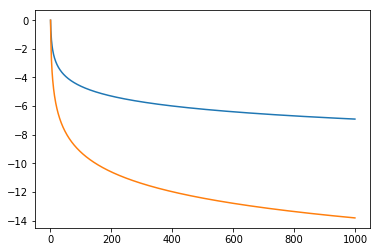

In [32]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 1000)

plt.plot(x, np.log(1/x)) # alpha = 1, 藍色線條
plt.plot(x, np.log((1/x)**2)) # alpha = 2 橘色線條
plt.show()

接著我們改寫 Train 類別中的先驗分佈。

In [53]:
from thinkbayes import Suite


class Train(Suite): # 將均勻分佈作為先驗分佈
    
    def Likelihood(self, data, hypo):
        if data > hypo:
            return 0.0

        return 1.0/hypo


class Train_PowerLaw(Train):
    
    def __init__(self, hypos, alpha=1.0):
        super().__init__()
        for hypo in hypos: # 將冪律分佈作為先驗分佈
            self.Set(hypo, hypo**-alpha)
            
        self.Normalize()
    

def expected_values(hypos, data):
    suite = Train_PowerLaw(hypos)
    for datum in data:
        suite.Update(datum)
        
    print("假設範圍", hypos[0], "~", hypos[-1], "在看到編號", data,"後的期望值:", suite.Mean())
    
    
data = [60, 30, 90]
expected_values(range(1, 1001), data)
expected_values(range(1, 501), data)
expected_values(range(1, 2001), data)
expected_values(range(1, 100001), data)

假設範圍 1 ~ 1000 在看到編號 [60, 30, 90] 後的期望值: 133.2752313750312
假設範圍 1 ~ 500 在看到編號 [60, 30, 90] 後的期望值: 130.70846986256004
假設範圍 1 ~ 2000 在看到編號 [60, 30, 90] 後的期望值: 133.99746308073065
假設範圍 1 ~ 100000 在看到編號 [60, 30, 90] 後的期望值: 134.25408214850083


可以看到對於不同的 N 所得到的後驗分佈期望值差異變小了。

事實上對於任意大的 N 期望值大約收斂在 134（可以參考 N 從 1~100000 的例子）。

下圖將依據不同先驗，均勻分佈或冪律分佈，所產生的後驗分佈做比較。可以看到用冪律分佈作為先驗分佈的情況下，N 為 700 台的機率幾乎為零（0.00012910），約只有均勻分佈在 N 為 700 台的機率的 1/5。

在看到 [60] 後火車頭數量為 700 台的機率, Train : 0.000506178675062559
在看到 [60] 後火車頭數量為 700 台的機率, Train_PowerLaw : 0.00012910980381205072


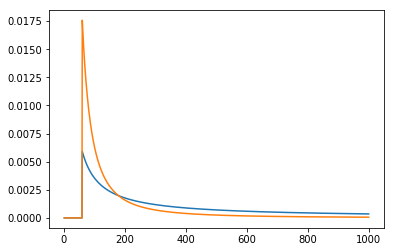

In [55]:
def plot_posterior(suite, data):
    for datum in data:
        suite.Update(datum)
    
    x, y = zip(*sorted(suite.Items()))
    print("在看到", data, "後火車頭數量為 700 台的機率,", suite.__class__.__name__,":", suite.Prob(700))
    plt.plot(x, y)
    
data = [60]
plot_posterior(Train(range(1, 1001)), data)
plot_posterior(Train_PowerLaw(range(1, 1001)), data)

所以將**冪律分佈作為先驗分佈是比較貼近真實情況的**，因為基於公司規模的訊息，還有上述的實驗中得知。

你可以在此下載到作者的原始碼：http://www.greenteapress.com/thinkbayes/train3.py